In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File "drugs" to Load 
mouse_drug_data_path = os.path.join("data","mouse_drug_data.csv")
drugs = pd.read_csv(mouse_drug_data_path)
drugs.head(10)


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [2]:
print(type(drugs))

<class 'pandas.core.frame.DataFrame'>


In [3]:
# File "trials" to Load 

mouse_trial_path = os.path.join("data","clinicaltrial_data.csv")
trials= pd.read_csv(mouse_trial_path)
trials.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [4]:
print(type(trials))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Combine the data into a single dataset

maintable = pd.merge(drugs,trials)
maintable.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [6]:
print(type(maintable))

<class 'pandas.core.frame.DataFrame'>


## Tumor Response to Treatment

In [87]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_by_drugs = maintable.groupby(['Drug','Timepoint'])
group_drugs_mean = group_by_drugs.mean()
#print(type(group_drugs_mean))
group_drugs_mean.head(10)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190

In [86]:
#group_by_drugs.groups
#dtype='int64' Dictionary

# Store the Standard Error of Tumor Volume Data Grouped by Drug and Timepoint 
#group_by_drugs = maintable.groupby(['Drug','Timepoint'])
group_drugs_std_error = group_by_drugs.sem()
#print(type(group_drugs_std_error))
group_drugs_std_error.head(10)


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731
          25                 0.181818       NaN            0.881642
          30                 0.172944       NaN            0.934460
          35                 0.169496       NaN            1.052241
          40                 0.175610       NaN            1.223608
          45                 0.202591       NaN            1.223977

In [85]:
# Minor Data Munging to Re-Format the Data Frames: mean
group_drugs_mean = group_drugs_mean.reset_index()
group_drugs_mean.head(10)

,index,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,Capomulin,0,45.000000,0.000000
1,1,Capomulin,5,44.266086,0.160000
2,2,Capomulin,10,43.084291,0.320000
3,3,Capomulin,15,42.064317,0.375000
4,4,Capomulin,20,40.716325,0.652174
5,5,Capomulin,25,39.939528,0.818182
6,6,Capomulin,30,38.769339,1.090909
7,7,Capomulin,35,37.816839,1.181818
8,8,Capomulin,40,36.958001,1.380952
9,9,Capomulin,45,36.236114,1.476190


In [82]:
# Minor Data Munging to Re-Format the Data Frames: std_error
group_drugs_std_error = group_drugs_std_error.reset_index()
group_drugs_std_error.head(5)

,level_0,index,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,0,0,Capomulin,0,0.000000,NaN,0.000000
1,1,1,Capomulin,5,0.074833,NaN,0.448593
2,2,2,Capomulin,10,0.125433,NaN,0.702684
3,3,3,Capomulin,15,0.132048,NaN,0.838617
4,4,4,Capomulin,20,0.161621,NaN,0.909731


In [11]:
volume_pivot = group_drugs_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
volume_pivot
#print(type(volume_pivot))

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [69]:
#sub group of 4 drugs
Capo = group_drugs_mean.loc[group_drugs_mean['Drug']=='Capomulin',:]
Infu = group_drugs_mean.loc[group_drugs_mean['Drug']=='Infubinol',:]
Keta = group_drugs_mean.loc[group_drugs_mean['Drug']=='Ketapril',:]
Place = group_drugs_mean.loc[group_drugs_mean['Drug']=='Placebo',:]



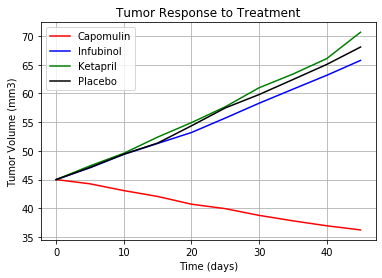

In [70]:
# Generate the Plot (with Error Bars)
Capomulin, = plt.plot(Capo["Timepoint"], Capo["Tumor Volume (mm3)"], color="red", label = "Capomulin")
Infubinol, = plt.plot(Infu["Timepoint"], Infu["Tumor Volume (mm3)"], color="blue", label = "Infubinol")
Ketapril, = plt.plot(Keta["Timepoint"], Keta["Tumor Volume (mm3)"], color="green", label = "Ketapril")
Placebo, = plt.plot(Place["Timepoint"], Place["Tumor Volume (mm3)"], color="black", label = "Placebo")

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.grid(True)

# Create a legend for our chart
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Show the chart
plt.show()


In [71]:
# Save the figure
plt.savefig("TumorResponseTreatment.png")



<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [72]:
# Minor Data Munging to Re-Format the Data Frames
meta_pivot = group_drugs_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_pivot

#print(type(volume_pivot))
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


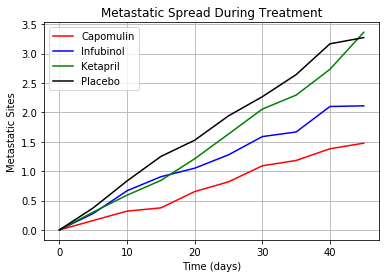

<Figure size 432x288 with 0 Axes>

In [88]:
# Generate the Plot (with Error Bars)
Capomulin, = plt.plot(Capo["Timepoint"], Capo["Metastatic Sites"], color="red", label = "Capomulin")
Infubinol, = plt.plot(Infu["Timepoint"], Infu["Metastatic Sites"], color="blue", label = "Infubinol")
Ketapril, = plt.plot(Keta["Timepoint"], Keta["Metastatic Sites"], color="green", label = "Ketapril")
Placebo, = plt.plot(Place["Timepoint"], Place["Metastatic Sites"], color="black", label = "Placebo")

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (days)")
plt.grid(True)

# Create a legend for our chart
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Show the chart
plt.show()
# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [84]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_by_drugs_mice_number = group_by_drugs.count()
group_by_drugs_mice_number.head(10)
#print(type(group_by_drugs_mice_number))
#it is a dataframe

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23
          25               22                  22                22
          30               22                  22                22
          35               22                  22                22
          40               21                  21                21
          45               21                  21                21

In [98]:
# Minor Data Munging to Re-Format the Data Frames: mean
group_by_drugs_mice_number = group_by_drugs_mice_number.reset_index()
group_by_drugs_mice_number.head(10)


,index,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,0,Capomulin,0,25,25,25
1,1,Capomulin,5,25,25,25
2,2,Capomulin,10,25,25,25
3,3,Capomulin,15,24,24,24
4,4,Capomulin,20,23,23,23
5,5,Capomulin,25,22,22,22
6,6,Capomulin,30,22,22,22
7,7,Capomulin,35,22,22,22
8,8,Capomulin,40,21,21,21
9,9,Capomulin,45,21,21,21


In [105]:
print(type(group_by_drugs_mice_number))

<class 'pandas.core.frame.DataFrame'>


In [106]:
# Minor Data Munging to Re-Format the Data Frames: std_error
group_by_drugs_mice_number = group_by_drugs_mice_number.reset_index()
group_by_drugs_mice_number.head(5)


,level_0,index,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,0,0,Capomulin,0,25,25,25
1,1,1,Capomulin,5,25,25,25
2,2,2,Capomulin,10,25,25,25
3,3,3,Capomulin,15,24,24,24
4,4,4,Capomulin,20,23,23,23


In [107]:
# Preview the Data Frame
sur_pivot = group_by_drugs_mice_number.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
sur_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [133]:
#sub group of 4 drugs
capo_m = group_by_drugs_mice_number.loc[group_by_drugs_mice_number['Drug']=='Capomulin',:]
infu_m = group_by_drugs_mice_number.loc[group_by_drugs_mice_number['Drug']=='Infubinol',:]
keta_m = group_by_drugs_mice_number.loc[group_by_drugs_mice_number['Drug']=='Ketapril',:]
place_m = group_by_drugs_mice_number.loc[group_by_drugs_mice_number['Drug']=='Placebo',:]

In [134]:
capo_m.head(10)

,level_0,index,Drug,Timepoint,Mouse ID,Tumor Volume (mm3),Metastatic Sites
0,0,0,Capomulin,0,25,25,25
1,1,1,Capomulin,5,25,25,25
2,2,2,Capomulin,10,25,25,25
3,3,3,Capomulin,15,24,24,24
4,4,4,Capomulin,20,23,23,23
5,5,5,Capomulin,25,22,22,22
6,6,6,Capomulin,30,22,22,22
7,7,7,Capomulin,35,22,22,22
8,8,8,Capomulin,40,21,21,21
9,9,9,Capomulin,45,21,21,21


In [135]:
print(type(capo_m))

<class 'pandas.core.frame.DataFrame'>


In [138]:
capo_m.dtypes

level_0                int64
index                  int64
Drug                  object
Timepoint              int64
Mouse ID               int64
Tumor Volume (mm3)     int64
Metastatic Sites       int64
dtype: object

In [139]:
#create column % survival
survival_rate_capo = (capo_m['Mouse ID']/25)*100
survival_rate_capo
survival_rate_infu = (infu_m['Mouse ID']/25)*100
survival_rate_keta = (keta_m['Mouse ID']/25)*100
survival_rate_place = (place_m['Mouse ID']/25)*100

In [144]:
survival_rate_capo_m = pd.DataFrame(survival_rate_capo)
survival_rate_capo_m
survival_rate_infu_m = pd.DataFrame(survival_rate_infu)
survival_rate_keta_m = pd.DataFrame(survival_rate_keta)
survival_rate_place_m = pd.DataFrame(survival_rate_place)

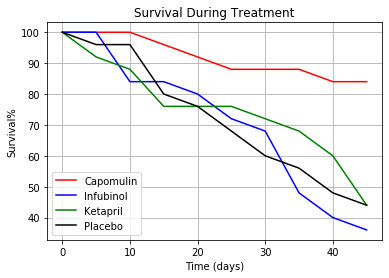

<Figure size 432x288 with 0 Axes>

In [145]:
# Generate the Plot (Accounting for percentages)
Capomulin, = plt.plot(capo_m["Timepoint"], survival_rate_capo_m["Mouse ID"], color="red", label = "Capomulin")
Infubinol, = plt.plot(infu_m["Timepoint"], survival_rate_infu_m["Mouse ID"], color="blue", label = "Infubinol")
Ketapril, = plt.plot(keta_m["Timepoint"], survival_rate_keta_m["Mouse ID"], color="green", label = "Ketapril")
Placebo, = plt.plot(place_m["Timepoint"], survival_rate_place_m["Mouse ID"], color="black", label = "Placebo")

plt.title("Survival During Treatment")
plt.ylabel("Survival%")
plt.xlabel("Time (days)")
plt.grid(True)

# Create a legend for our chart
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], labels=["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best")

# Show the chart
plt.show()
# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)